**Submitted by :**
ABHAY BHASKARAN M T

In [ ]:
import polars as pl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

#Data Content

* **Age:** Age of the patient

* **Sex:** Sex of the patient

* **exang:** exercise induced angina (1 = yes; 0 = no)

* **ca:** number of major vessels (0-3)

* **cp:** Chest Pain type chest pain type

    *  Value 0: typical angina
    *  Value 1: atypical angina
    *  Value 2: non-anginal pain
    *  Value 3: asymptomatic

* **trtbps:** resting blood pressure (in mm Hg)

* **chol:** cholestoral in mg/dl fetched via BMI sensor

* **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* **rest_ecg:** resting electrocardiographic results
    *   Value 0: normal
    *   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

*  **thalach:** maximum heart rate achieved

*  **target:** 0= less chance of heart attack 1= more chance of heart attack




In [ ]:
df=pl.read_csv('/content/heart_attack.csv')

In [ ]:
df.head()

age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64,i64,i64
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

describe,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.39934,0.729373,2.313531,0.544554
"""std""",9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.52586,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
"""min""",29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",48.0,0.0,0.0,120.0,211.0,0.0,0.0,134.0,0.0,0.0,1.0,0.0,2.0,0.0
"""50%""",55.0,1.0,1.0,130.0,240.0,0.0,1.0,153.0,0.0,0.8,1.0,0.0,2.0,1.0
"""75%""",61.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,1.6,2.0,1.0,3.0,1.0
"""max""",77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0


# DUPLICATES

In [ ]:
# 1. Finding Duplicates
duplicates = df.filter(df.is_duplicated())
print("Duplicates:")
print(duplicates)

Duplicates:
shape: (2, 14)
┌─────┬─────┬─────┬────────┬───┬─────┬─────┬───────┬────────┐
│ age ┆ sex ┆ cp  ┆ trtbps ┆ … ┆ slp ┆ caa ┆ thall ┆ output │
│ --- ┆ --- ┆ --- ┆ ---    ┆   ┆ --- ┆ --- ┆ ---   ┆ ---    │
│ i64 ┆ i64 ┆ i64 ┆ i64    ┆   ┆ i64 ┆ i64 ┆ i64   ┆ i64    │
╞═════╪═════╪═════╪════════╪═══╪═════╪═════╪═══════╪════════╡
│ 38  ┆ 1   ┆ 2   ┆ 138    ┆ … ┆ 2   ┆ 4   ┆ 2     ┆ 1      │
│ 38  ┆ 1   ┆ 2   ┆ 138    ┆ … ┆ 2   ┆ 4   ┆ 2     ┆ 1      │
└─────┴─────┴─────┴────────┴───┴─────┴─────┴───────┴────────┘


 # Missing values

In [ ]:
def count_missing_values(df):
    missing_counts = {}
    for col in df.columns:
        column_data = df[col]
        if column_data.dtype in [pl.Float64, pl.Int64, pl.Int32, pl.Float32]:  # Checking for numeric columns
            missing_counts[col] = df.filter(pl.col(col).is_null()).shape[0]
        else:
            missing_counts[col] = df.filter(pl.col(col).is_null()).shape[0]
    return missing_counts

count_missing_values(df)

{'age': 0,
 'sex': 0,
 'cp': 0,
 'trtbps': 0,
 'chol': 0,
 'fbs': 0,
 'restecg': 0,
 'thalachh': 0,
 'exng': 0,
 'oldpeak': 0,
 'slp': 0,
 'caa': 0,
 'thall': 0,
 'output': 0}

#Null Values

In [ ]:
# null value
null_values = df.null_count()
null_values

age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Outliers

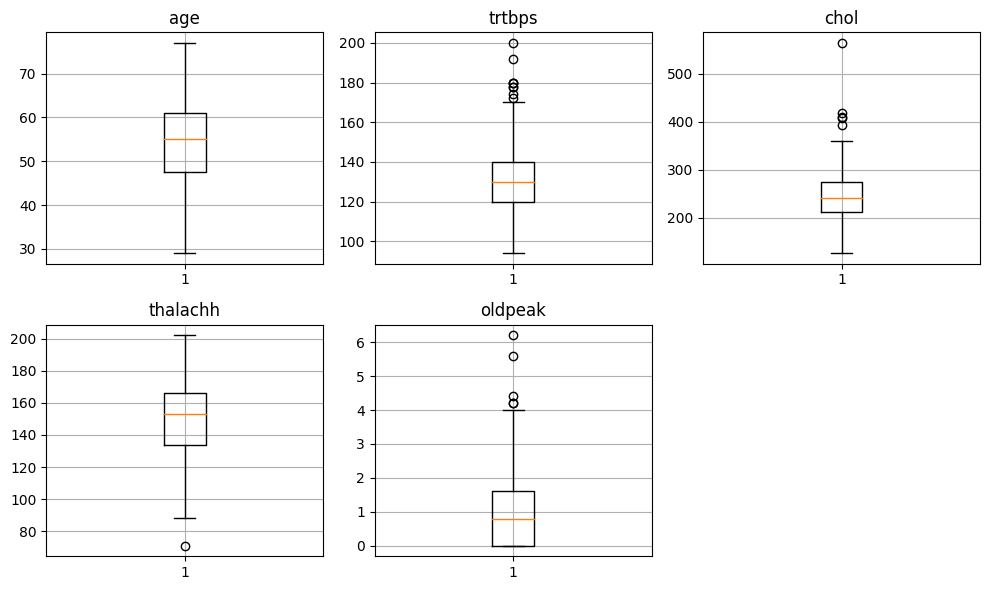

In [ ]:
# Boxplot for each numerical column after removing outliers
# List of numerical columns
numerical_list = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_list, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[col])
    plt.title(col)
    plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# List of numerical columns
numerical_list = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

# Function to calculate outliers
def find_outliers(df, columns):
    outliers = {}
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        outliers[col] = df.filter((pl.col(col) < lower_bound) | (pl.col(col) > upper_bound))
    return outliers

# Find outliers for each numerical column
outliers = find_outliers(df, numerical_list)

# Print the outliers
for col, outlier_df in outliers.items():
    print(f"Outliers in column {col}:")
    print(outlier_df)
    print()

Outliers in column age:
shape: (0, 14)
┌─────┬─────┬─────┬────────┬───┬─────┬─────┬───────┬────────┐
│ age ┆ sex ┆ cp  ┆ trtbps ┆ … ┆ slp ┆ caa ┆ thall ┆ output │
│ --- ┆ --- ┆ --- ┆ ---    ┆   ┆ --- ┆ --- ┆ ---   ┆ ---    │
│ i64 ┆ i64 ┆ i64 ┆ i64    ┆   ┆ i64 ┆ i64 ┆ i64   ┆ i64    │
╞═════╪═════╪═════╪════════╪═══╪═════╪═════╪═══════╪════════╡
└─────┴─────┴─────┴────────┴───┴─────┴─────┴───────┴────────┘

Outliers in column trtbps:
shape: (9, 14)
┌─────┬─────┬─────┬────────┬───┬─────┬─────┬───────┬────────┐
│ age ┆ sex ┆ cp  ┆ trtbps ┆ … ┆ slp ┆ caa ┆ thall ┆ output │
│ --- ┆ --- ┆ --- ┆ ---    ┆   ┆ --- ┆ --- ┆ ---   ┆ ---    │
│ i64 ┆ i64 ┆ i64 ┆ i64    ┆   ┆ i64 ┆ i64 ┆ i64   ┆ i64    │
╞═════╪═════╪═════╪════════╪═══╪═════╪═════╪═══════╪════════╡
│ 52  ┆ 1   ┆ 2   ┆ 172    ┆ … ┆ 2   ┆ 0   ┆ 3     ┆ 1      │
│ 59  ┆ 1   ┆ 3   ┆ 178    ┆ … ┆ 0   ┆ 0   ┆ 3     ┆ 1      │
│ 64  ┆ 0   ┆ 0   ┆ 180    ┆ … ┆ 2   ┆ 0   ┆ 2     ┆ 1      │
│ 68  ┆ 1   ┆ 2   ┆ 180    ┆ … ┆ 1   ┆ 0   ┆ 3    

#Cleaning the data

In [ ]:
# Remove rows with any null values
df_cleaned = df.drop_nulls()

In [ ]:
# Removing duplicates from the DataFrame
df_cleaned = df.groupby(df.columns).first()

<ipython-input-11-9e6666a2a658>:2: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  df_cleaned = df.groupby(df.columns).first()


In [ ]:
# Function to remove outliers
def remove_outliers(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Use filter operation to remove outliers
        df = df.filter((pl.col(col) >= lower_bound) & (pl.col(col) <= upper_bound))
    return df
numerical_list = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

# Remove outliers from the DataFrame
df_cleaned = remove_outliers(df, numerical_list)

#EDA

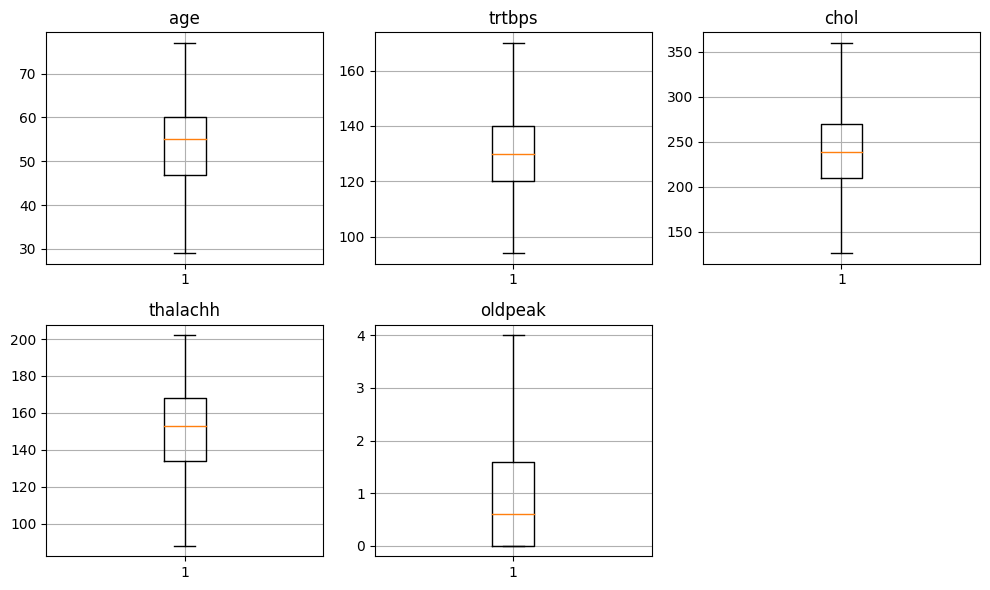

In [ ]:
# Boxplot for each numerical column after removing outliers
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_list, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df_cleaned[col])
    plt.title(col)
    plt.grid(True)
plt.tight_layout()
plt.show()


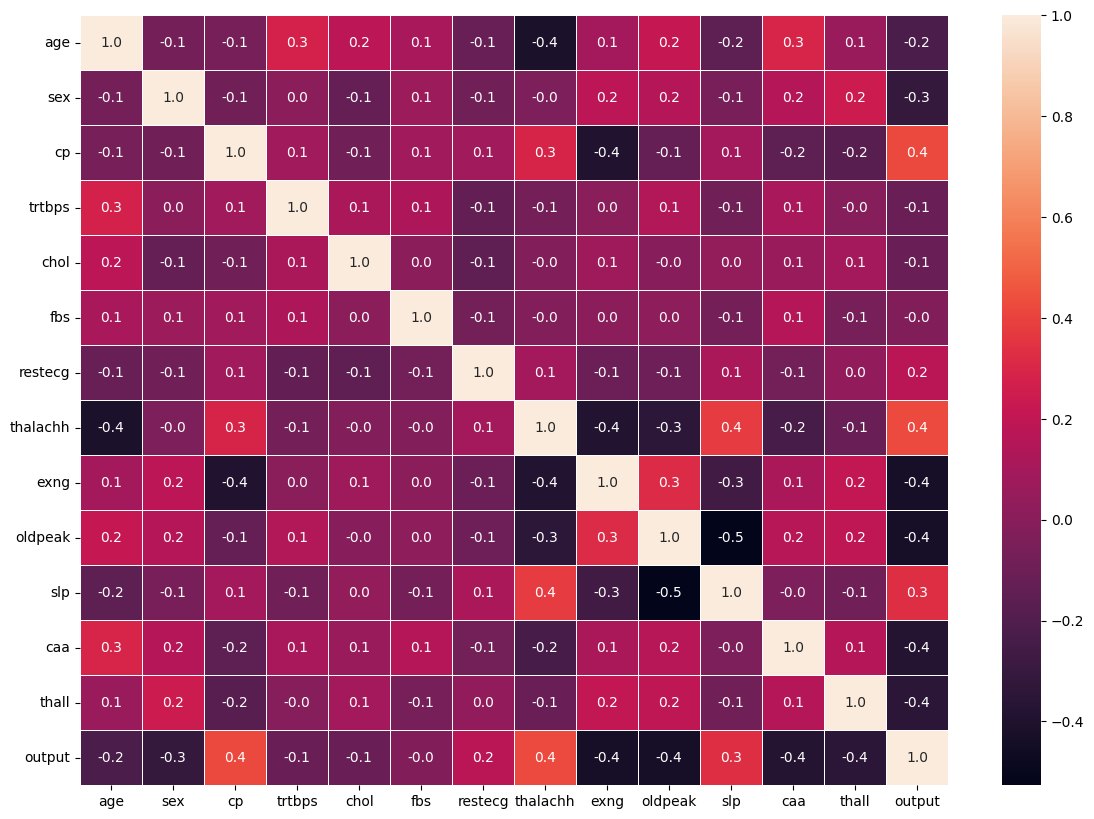

In [ ]:
df_pandas = df_cleaned.to_pandas()

plt.figure(figsize = (14,10))
sns.heatmap(df_pandas.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

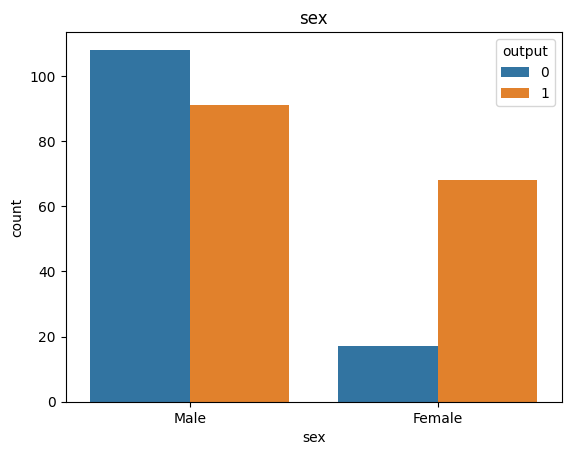

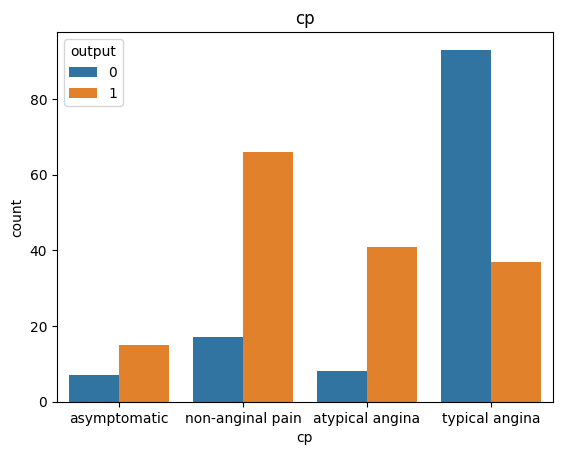

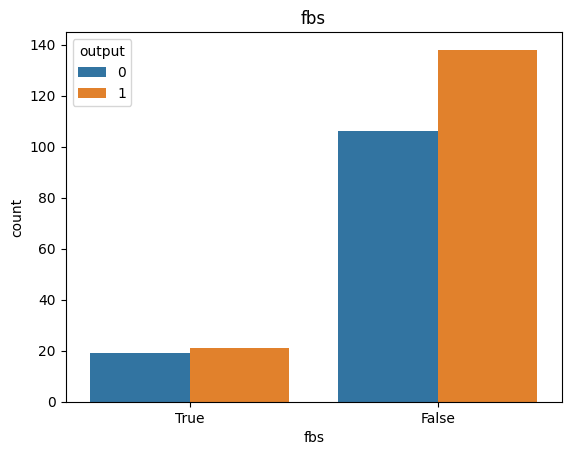

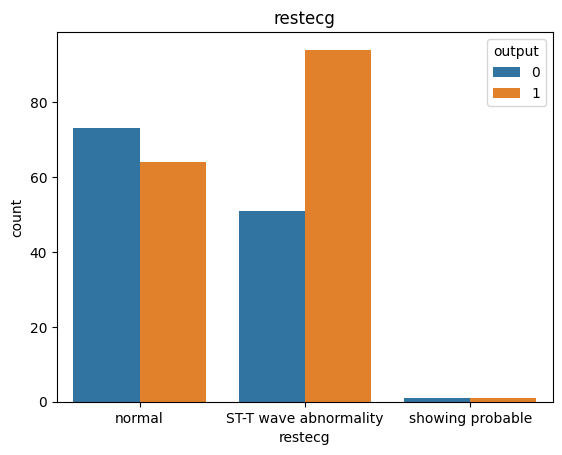

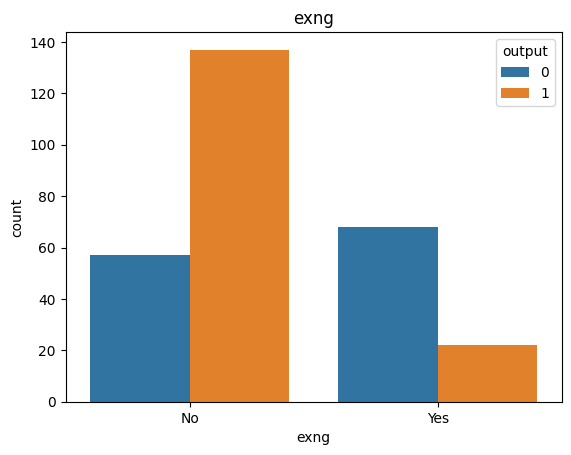

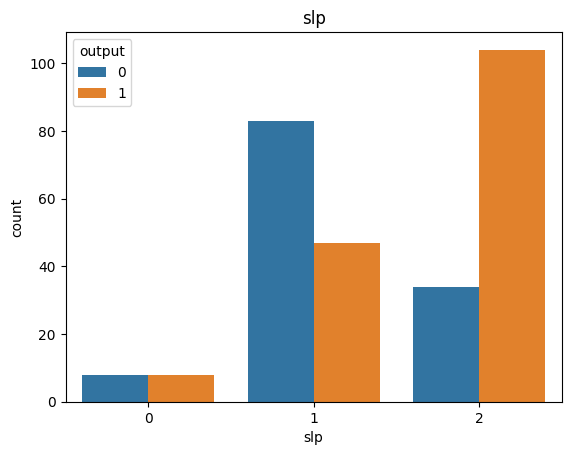

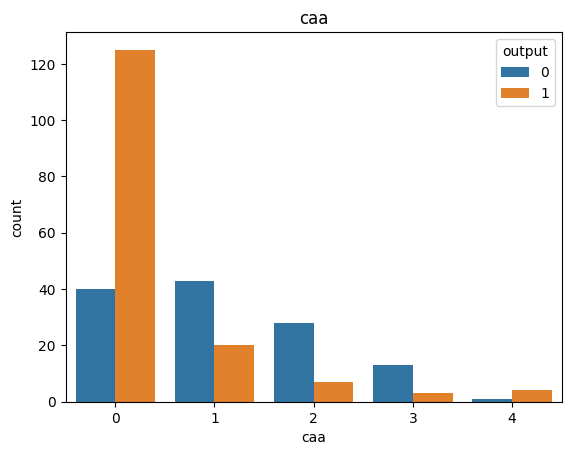

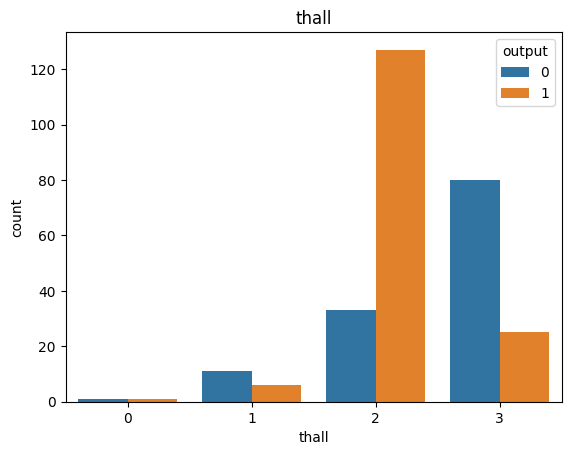

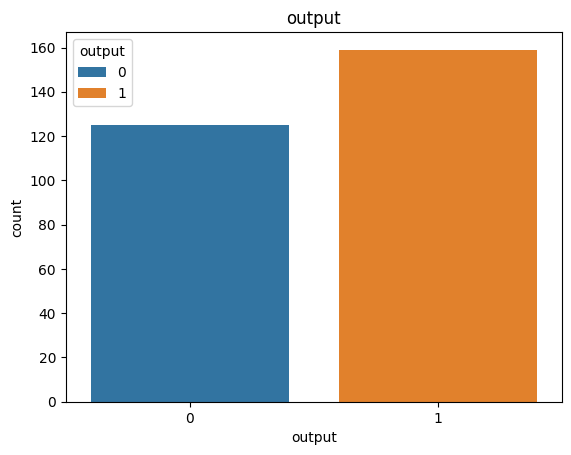

In [ ]:
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","caa","thall","output"]

# Replace numeric values with labels in the "sex" column
df_pandas['sex'] = df_pandas['sex'].map({0: 'Female', 1: 'Male'})

df_pandas['cp'] = df_pandas['cp'].map({0: 'typical angina', 1: 'atypical angina',2:'non-anginal pain' ,3:'asymptomatic'})

df_pandas['fbs'] = df_pandas['fbs'].map({0: 'False', 1: 'True'})

df_pandas['restecg'] = df_pandas['restecg'].map({0: 'normal', 1: 'ST-T wave abnormality',2:'showing probable'})

df_pandas['exng'] = df_pandas['exng'].map({0: 'No', 1: 'Yes'})

df_categoric = df_pandas.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "output")
    plt.title(i)

In [ ]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       284 non-null    int64  
 1   sex       284 non-null    object 
 2   cp        284 non-null    object 
 3   trtbps    284 non-null    int64  
 4   chol      284 non-null    int64  
 5   fbs       284 non-null    object 
 6   restecg   284 non-null    object 
 7   thalachh  284 non-null    int64  
 8   exng      284 non-null    object 
 9   oldpeak   284 non-null    float64
 10  slp       284 non-null    int64  
 11  caa       284 non-null    int64  
 12  thall     284 non-null    int64  
 13  output    284 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 31.2+ KB


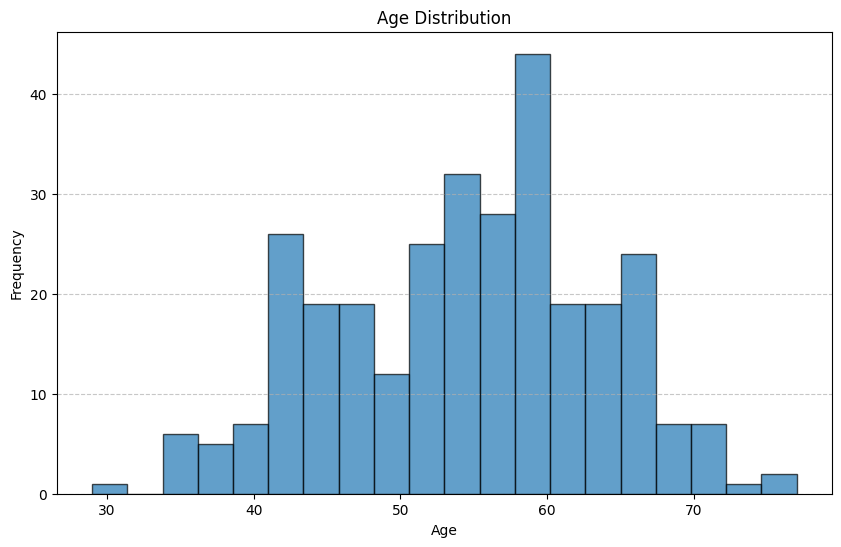

In [ ]:
# Plotting the age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-18-978f54f1e966>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_pandas[df_pandas['output'] == 0]['age'], shade=True, color="blue", label="Output = 0")
<ipython-input-18-978f54f1e966>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_pandas[df_pandas['output'] == 1]['age'], shade=True, color="red", label="Output = 1")


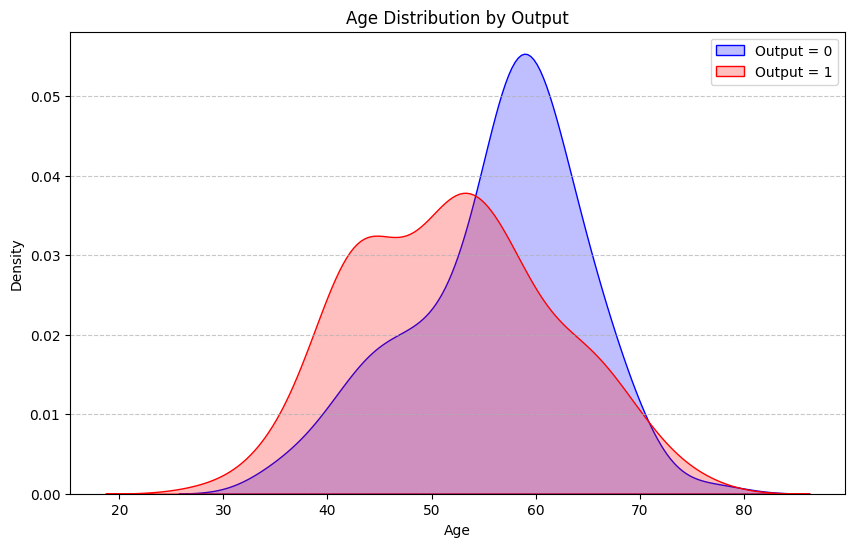

In [ ]:
plt.figure(figsize=(10, 6))

# Plot KDE for 'output' == 0
sns.kdeplot(df_pandas[df_pandas['output'] == 0]['age'], shade=True, color="blue", label="Output = 0")

# Plot KDE for 'output' == 1
sns.kdeplot(df_pandas[df_pandas['output'] == 1]['age'], shade=True, color="red", label="Output = 1")

plt.title('Age Distribution by Output')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

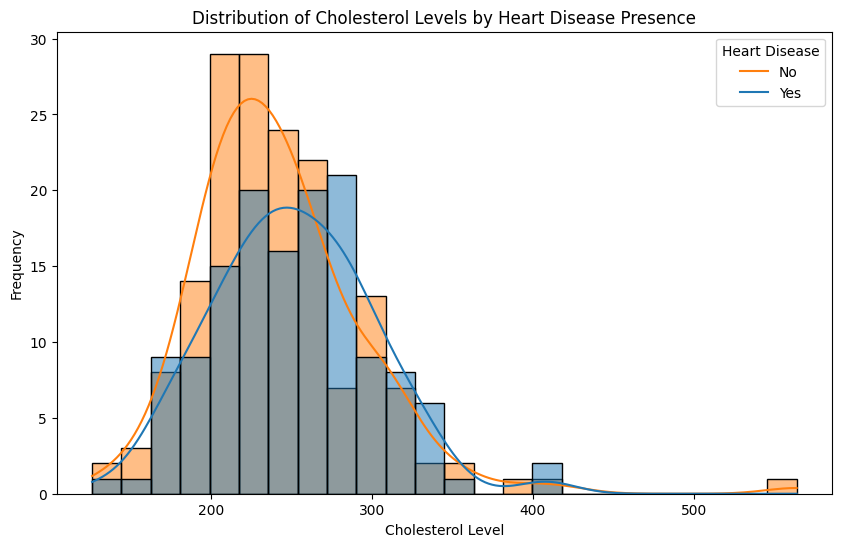

In [ ]:
# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='chol', hue='output', kde=True)
plt.title('Distribution of Cholesterol Levels by Heart Disease Presence')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

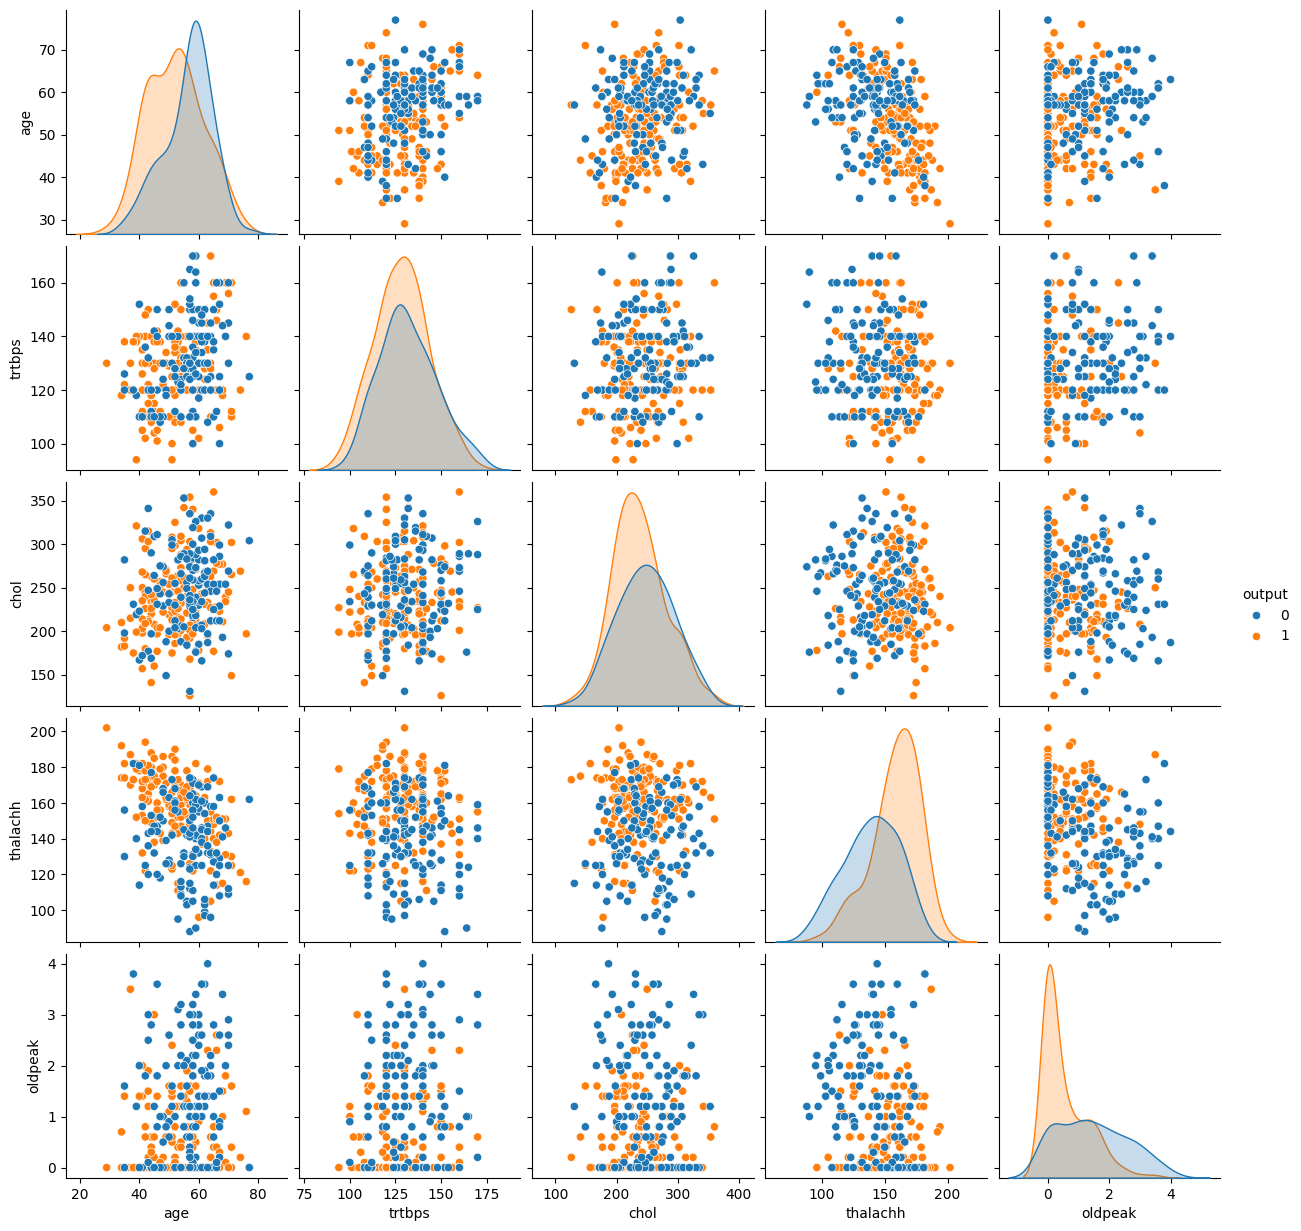

In [ ]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]

df_numeric = df_pandas.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

#Skewness

In [ ]:
from scipy.stats import skew

# Calculate skewness for each numerical column
numerical_columns = df.select(pl.col(pl.Float64), pl.col(pl.Int64)).columns
skewness = {col: skew(df[col].to_numpy()) for col in numerical_columns}

print("Skewness of each numerical column:")
skewness

Skewness of each numerical column:


{'oldpeak': 1.2634255245891595,
 'age': -0.2014596901125439,
 'sex': -0.7874122909518428,
 'cp': 0.4823293961332623,
 'trtbps': 0.7102300604861443,
 'chol': 1.1377326187082244,
 'fbs': 1.976803464683451,
 'restecg': 0.1617165704075642,
 'thalachh': -0.5347455419075503,
 'exng': 0.7388505791113107,
 'slp': -0.5057957274757736,
 'caa': 1.303925955673585,
 'thall': -0.47435893118696904,
 'output': -0.17892962380969754}

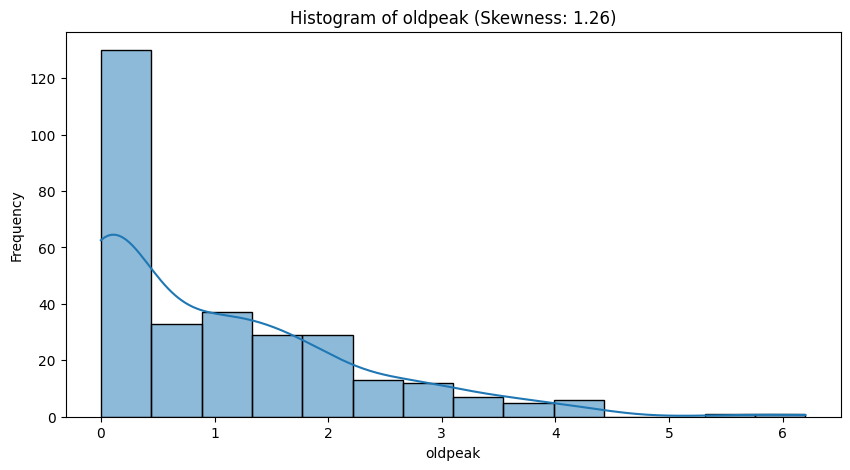

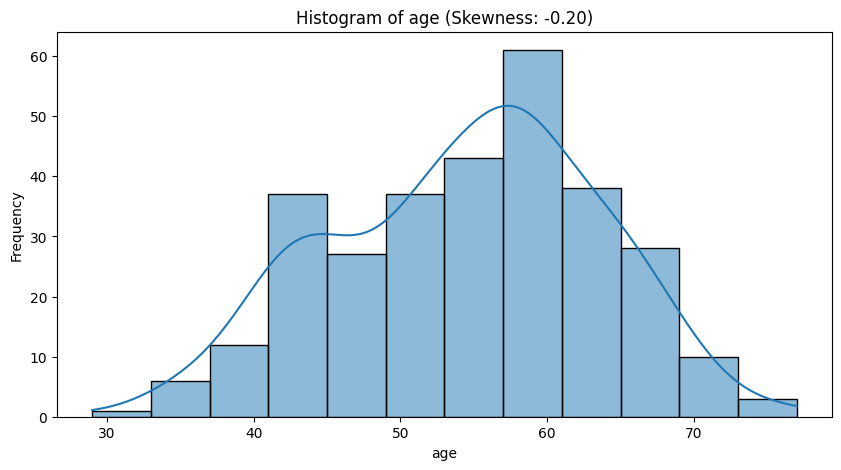

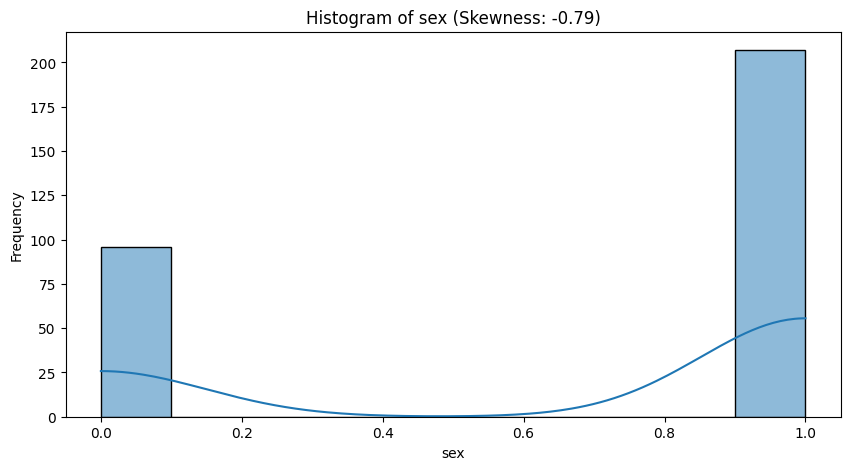

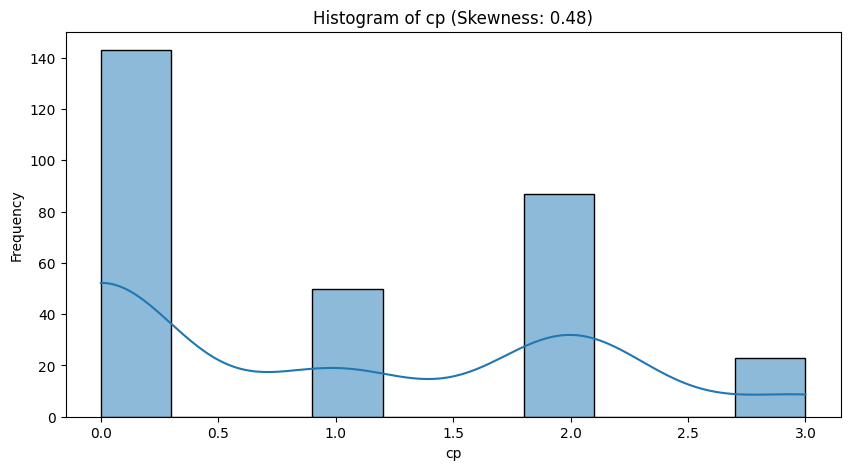

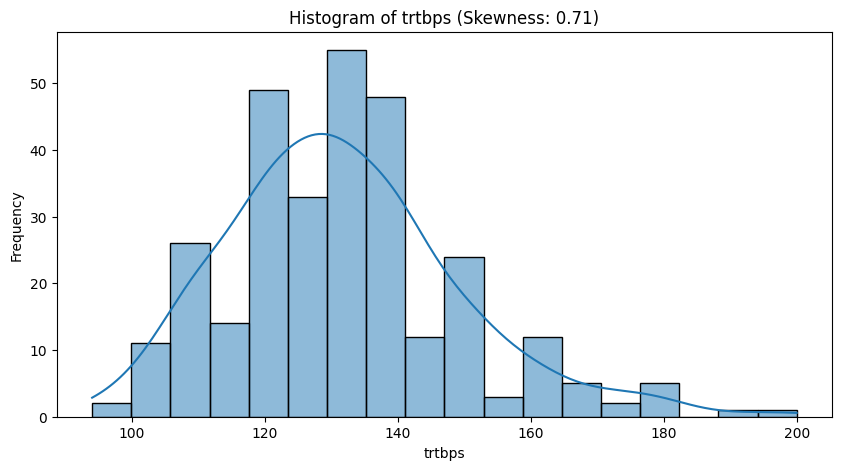

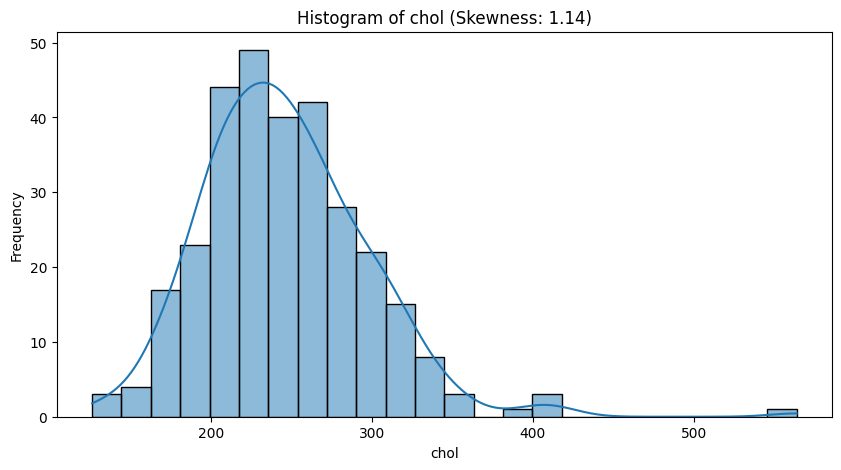

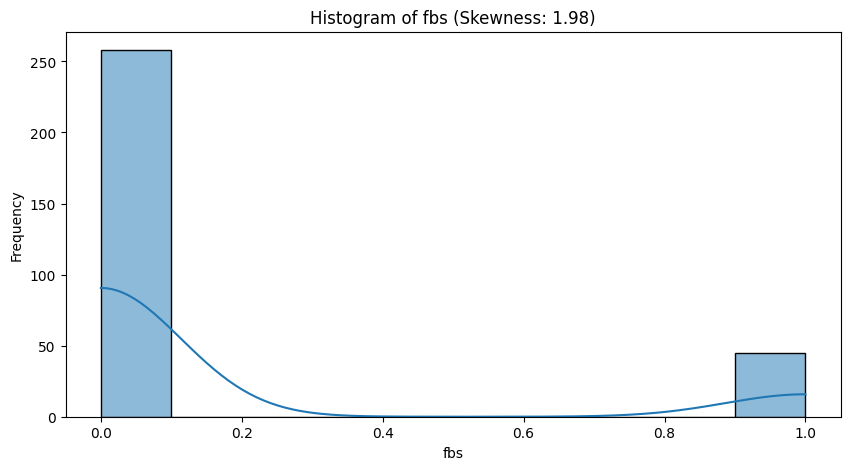

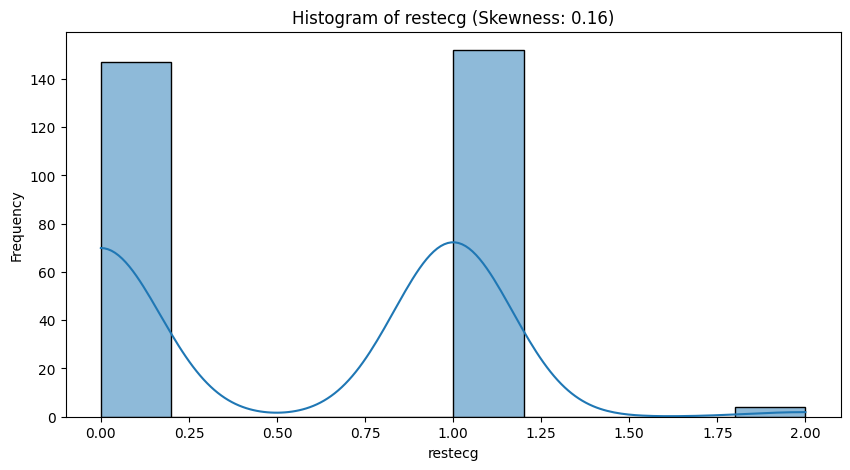

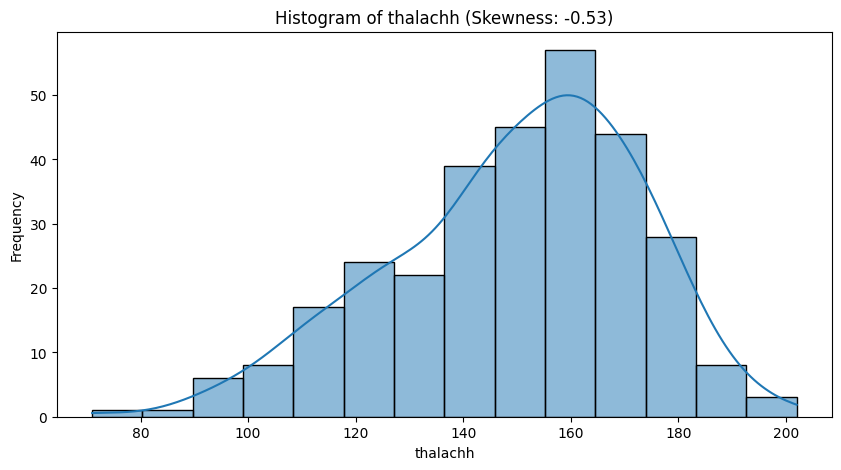

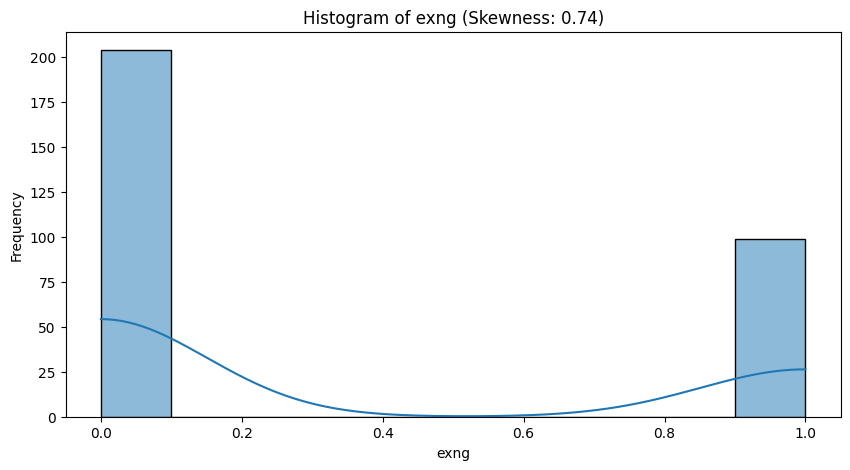

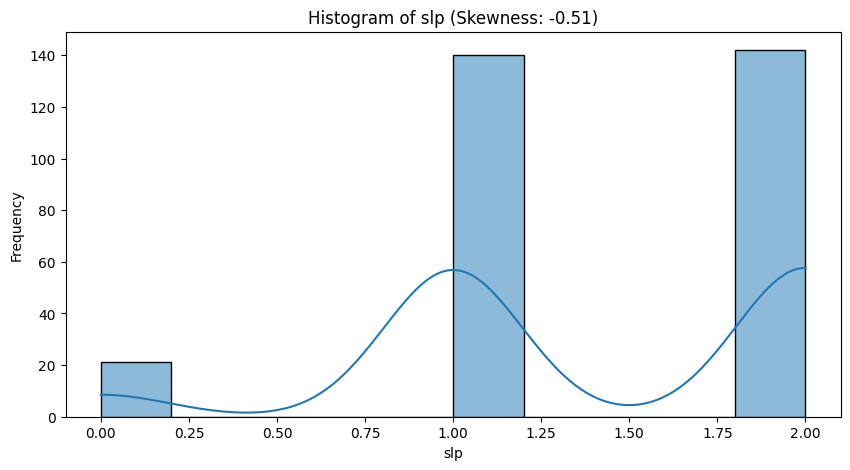

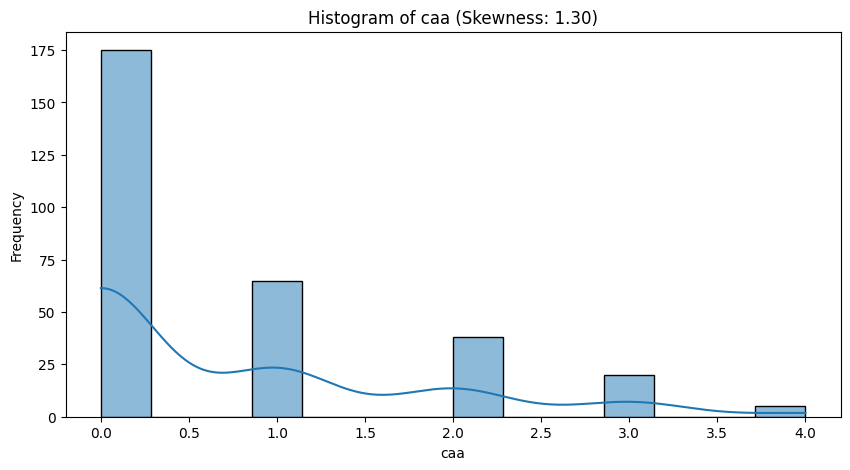

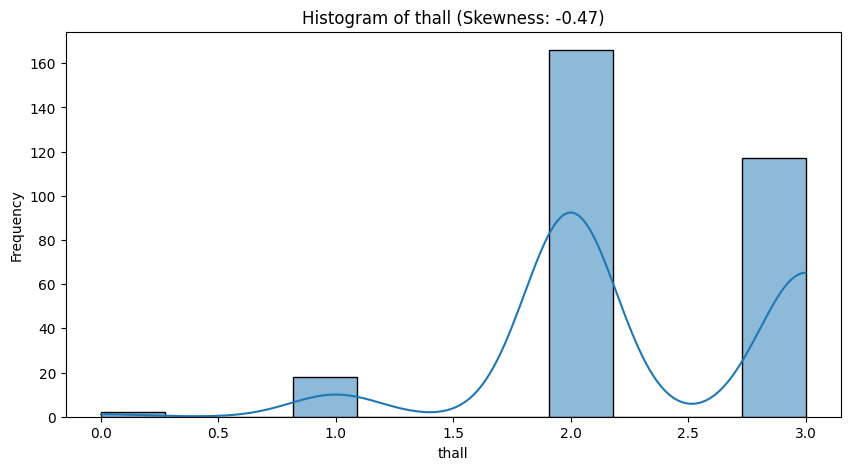

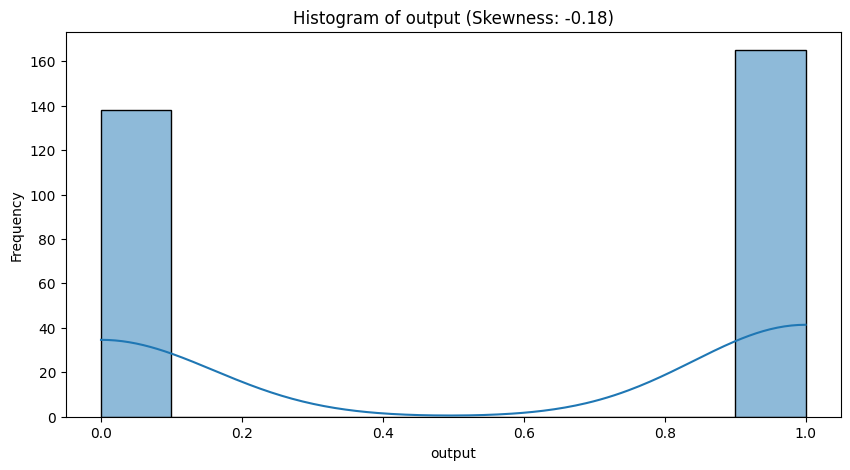

In [ ]:
# Plot histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col].to_numpy(), kde=True)
    plt.title(f'Histogram of {col} (Skewness: {skewness[col]:.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

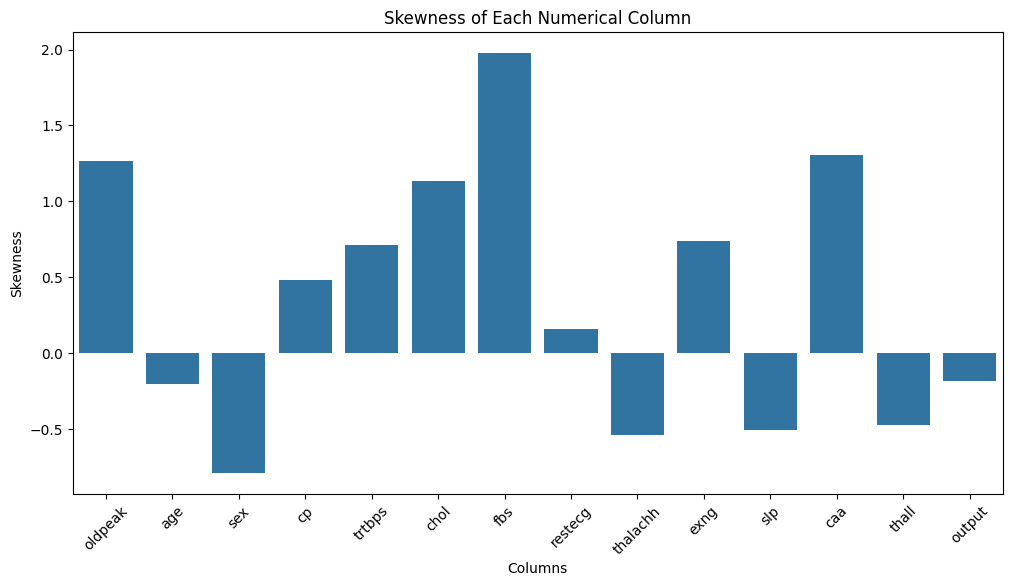

In [ ]:
# Bar plot for skewness
plt.figure(figsize=(12, 6))
sns.barplot(x=list(skewness.keys()), y=list(skewness.values()))
plt.title('Skewness of Each Numerical Column')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()


#Log Tranformation

In [ ]:
# Apply log transformation to positively skewed columns
log_transformed_df = df.with_columns(
    [pl.col(col).log().alias(f"log_{col}") for col in numerical_columns if df[col].min() > 0]
)

print("Log Transformed DataFrame:")
print(log_transformed_df)


Log Transformed DataFrame:
shape: (303, 18)
┌─────┬─────┬─────┬────────┬───┬──────────┬────────────┬──────────┬──────────────┐
│ age ┆ sex ┆ cp  ┆ trtbps ┆ … ┆ log_age  ┆ log_trtbps ┆ log_chol ┆ log_thalachh │
│ --- ┆ --- ┆ --- ┆ ---    ┆   ┆ ---      ┆ ---        ┆ ---      ┆ ---          │
│ i64 ┆ i64 ┆ i64 ┆ i64    ┆   ┆ f64      ┆ f64        ┆ f64      ┆ f64          │
╞═════╪═════╪═════╪════════╪═══╪══════════╪════════════╪══════════╪══════════════╡
│ 63  ┆ 1   ┆ 3   ┆ 145    ┆ … ┆ 4.143135 ┆ 4.976734   ┆ 5.451038 ┆ 5.010635     │
│ 37  ┆ 1   ┆ 2   ┆ 130    ┆ … ┆ 3.610918 ┆ 4.867534   ┆ 5.521461 ┆ 5.231109     │
│ 41  ┆ 0   ┆ 1   ┆ 130    ┆ … ┆ 3.713572 ┆ 4.867534   ┆ 5.31812  ┆ 5.147494     │
│ 56  ┆ 1   ┆ 1   ┆ 120    ┆ … ┆ 4.025352 ┆ 4.787492   ┆ 5.463832 ┆ 5.181784     │
│ …   ┆ …   ┆ …   ┆ …      ┆ … ┆ …        ┆ …          ┆ …        ┆ …            │
│ 45  ┆ 1   ┆ 3   ┆ 110    ┆ … ┆ 3.806662 ┆ 4.70048    ┆ 5.575949 ┆ 4.882802     │
│ 68  ┆ 1   ┆ 0   ┆ 144    ┆ … ┆ 4.219508 ┆

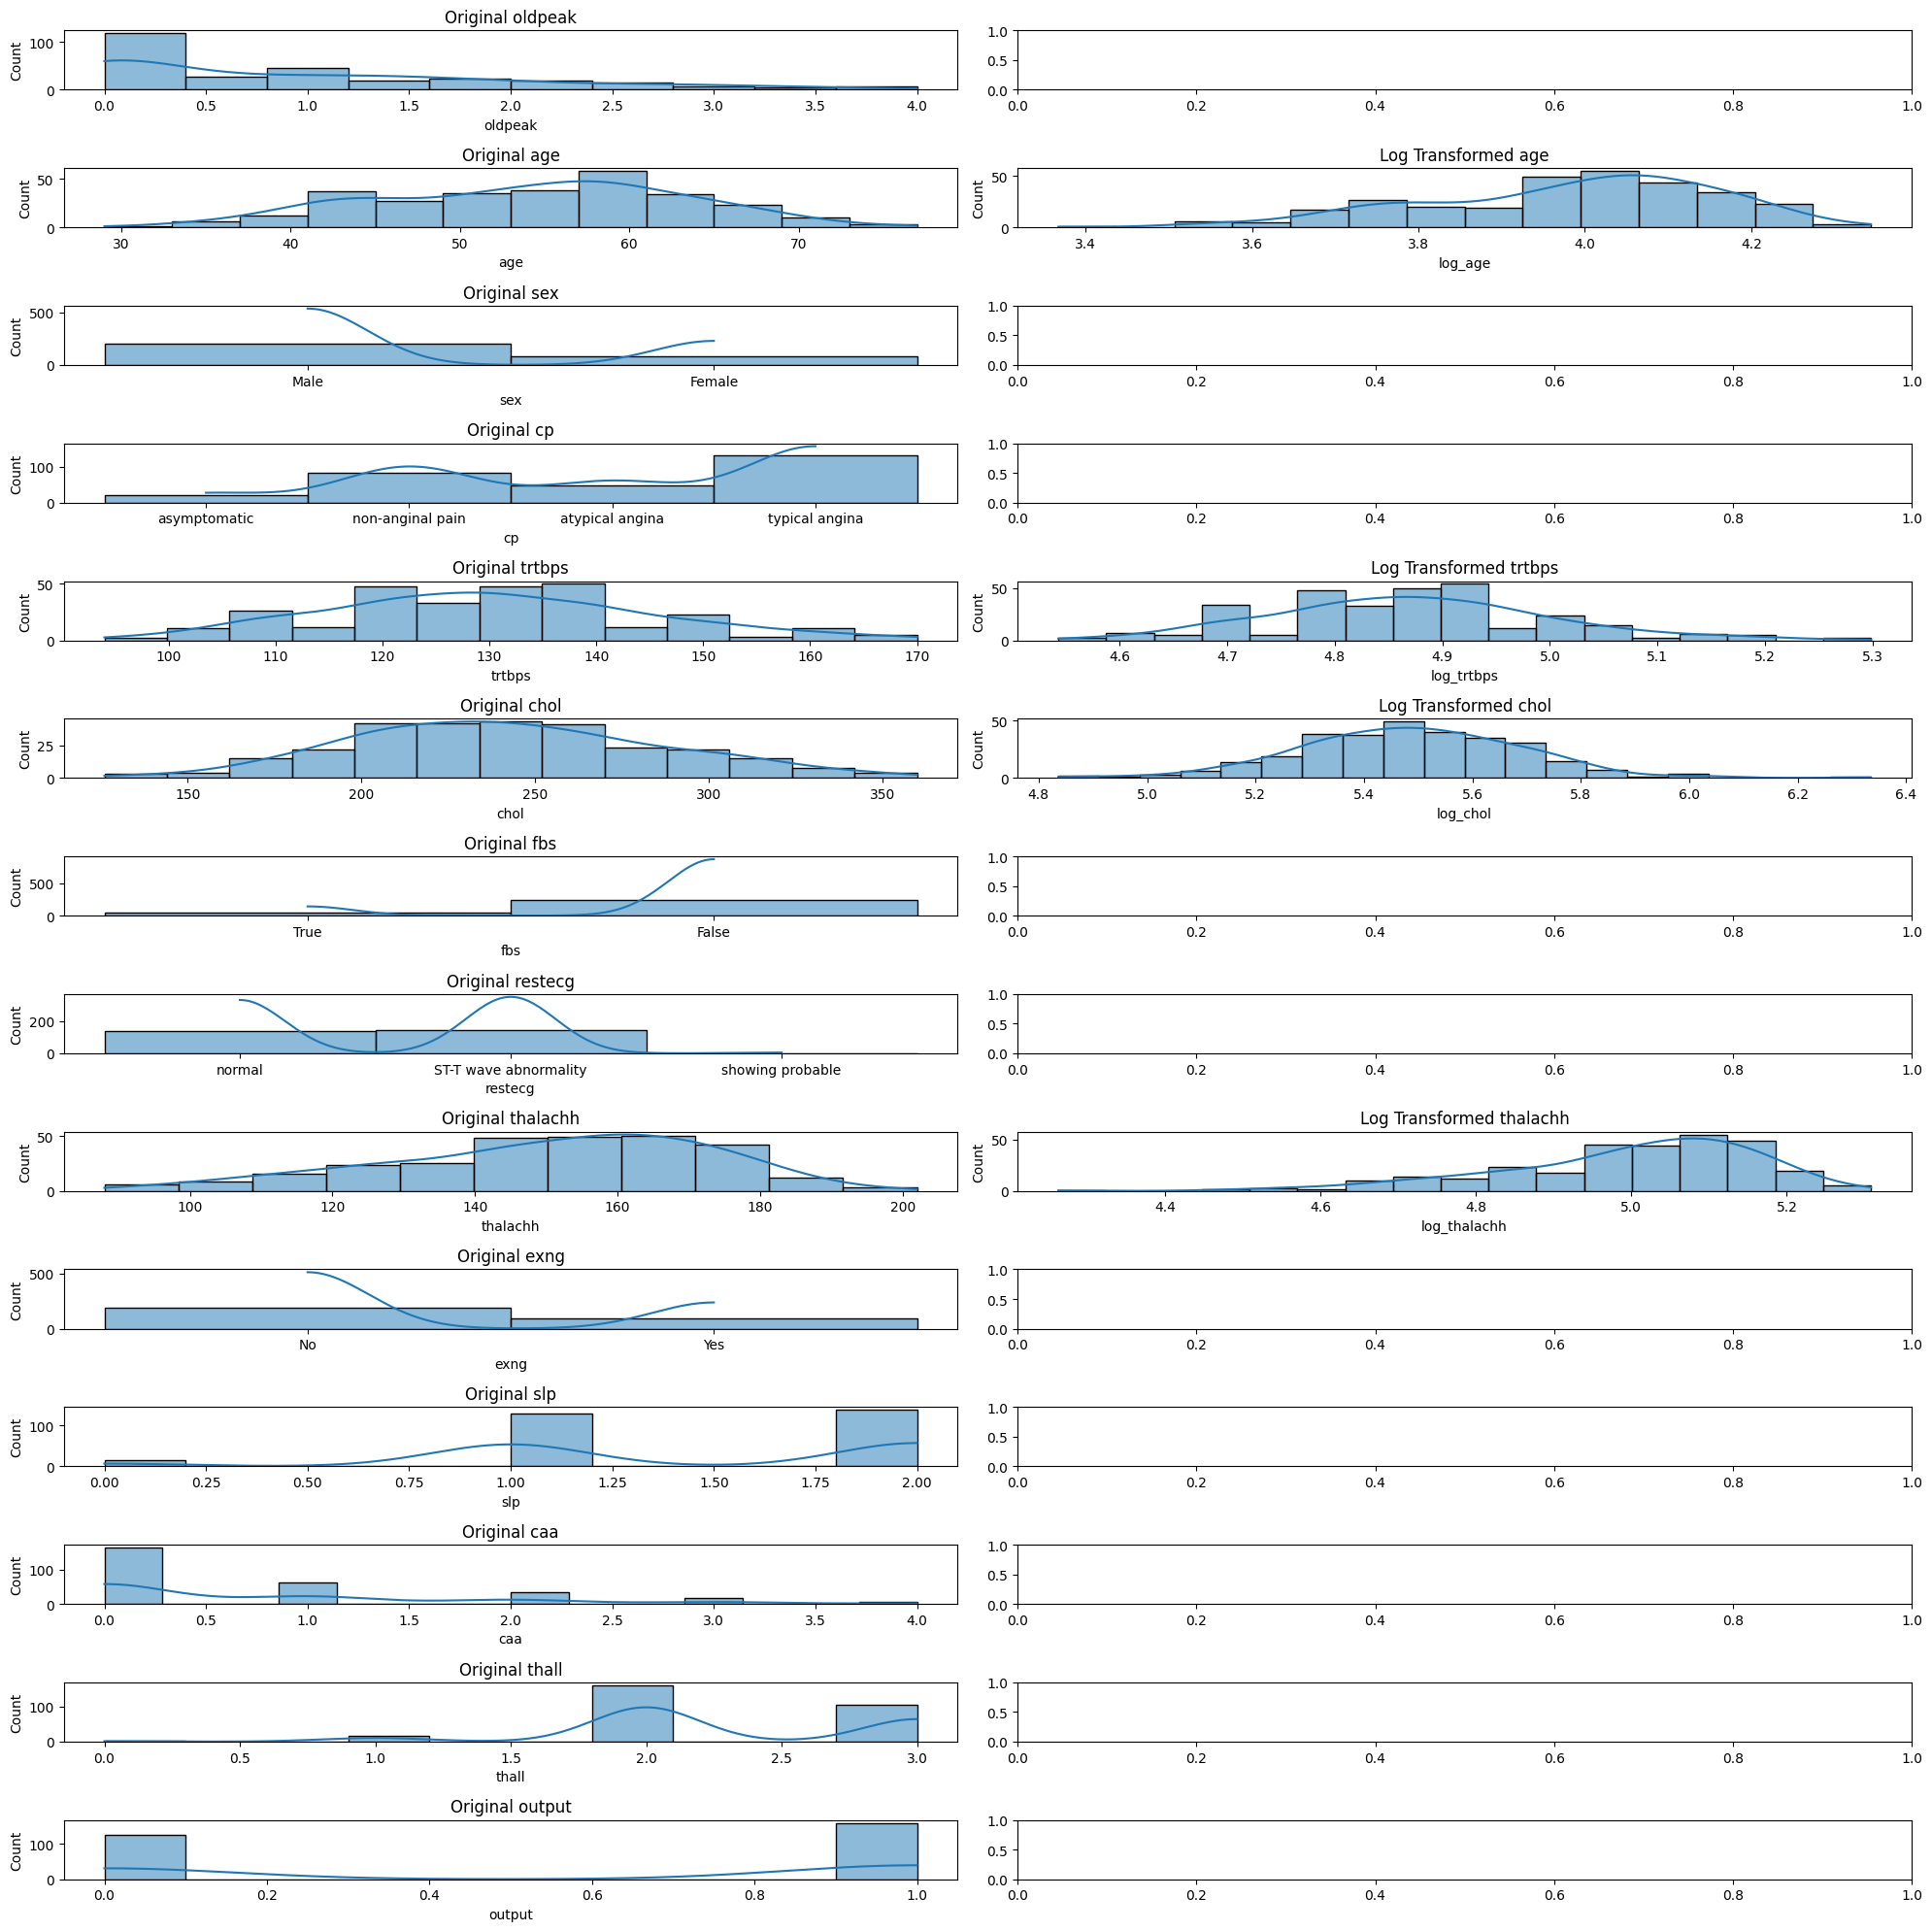

In [ ]:
log_transformed_df_pandas = log_transformed_df.to_pandas()

# Plotting the distributions
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(20, 20))

for i, col in enumerate(numerical_columns):
    sns.histplot(df_pandas[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f"Original {col}")

    if f"log_{col}" in log_transformed_df_pandas.columns:
        sns.histplot(log_transformed_df_pandas[f"log_{col}"], ax=axes[i, 1], kde=True)
        axes[i, 1].set_title(f"Log Transformed {col}")

plt.tight_layout()
plt.show()

#Power Transformation

In [ ]:
from scipy.stats import boxcox

# Apply Box-Cox transformation to positively skewed columns
boxcox_transformed_df = df.with_columns(
    [
        pl.Series(col, boxcox(df[col].to_numpy())[0]).alias(f"boxcox_{col}")
        for col in numerical_columns if df[col].min() > 0
    ]
)

print("Box-Cox Transformed DataFrame:")
print(boxcox_transformed_df)


Box-Cox Transformed DataFrame:
shape: (303, 18)
┌─────┬─────┬─────┬────────┬───┬────────────┬───────────────┬─────────────┬─────────────────┐
│ age ┆ sex ┆ cp  ┆ trtbps ┆ … ┆ boxcox_age ┆ boxcox_trtbps ┆ boxcox_chol ┆ boxcox_thalachh │
│ --- ┆ --- ┆ --- ┆ ---    ┆   ┆ ---        ┆ ---           ┆ ---         ┆ ---             │
│ i64 ┆ i64 ┆ i64 ┆ i64    ┆   ┆ f64        ┆ f64           ┆ f64         ┆ f64             │
╞═════╪═════╪═════╪════════╪═══╪════════════╪═══════════════╪═════════════╪═════════════════╡
│ 63  ┆ 1   ┆ 3   ┆ 145    ┆ … ┆ 245.026003 ┆ 1.390125      ┆ 4.141081    ┆ 33435.178719    │
│ 37  ┆ 1   ┆ 2   ┆ 130    ┆ … ┆ 115.210734 ┆ 1.386589      ┆ 4.180465    ┆ 54788.235951    │
│ 41  ┆ 0   ┆ 1   ┆ 130    ┆ … ┆ 133.288287 ┆ 1.386589      ┆ 4.065939    ┆ 45430.223348    │
│ 56  ┆ 1   ┆ 1   ┆ 120    ┆ … ┆ 207.381618 ┆ 1.383821      ┆ 4.148257    ┆ 49057.156271    │
│ …   ┆ …   ┆ …   ┆ …      ┆ … ┆ …          ┆ …             ┆ …           ┆ …               │
│ 45  ┆ 1   

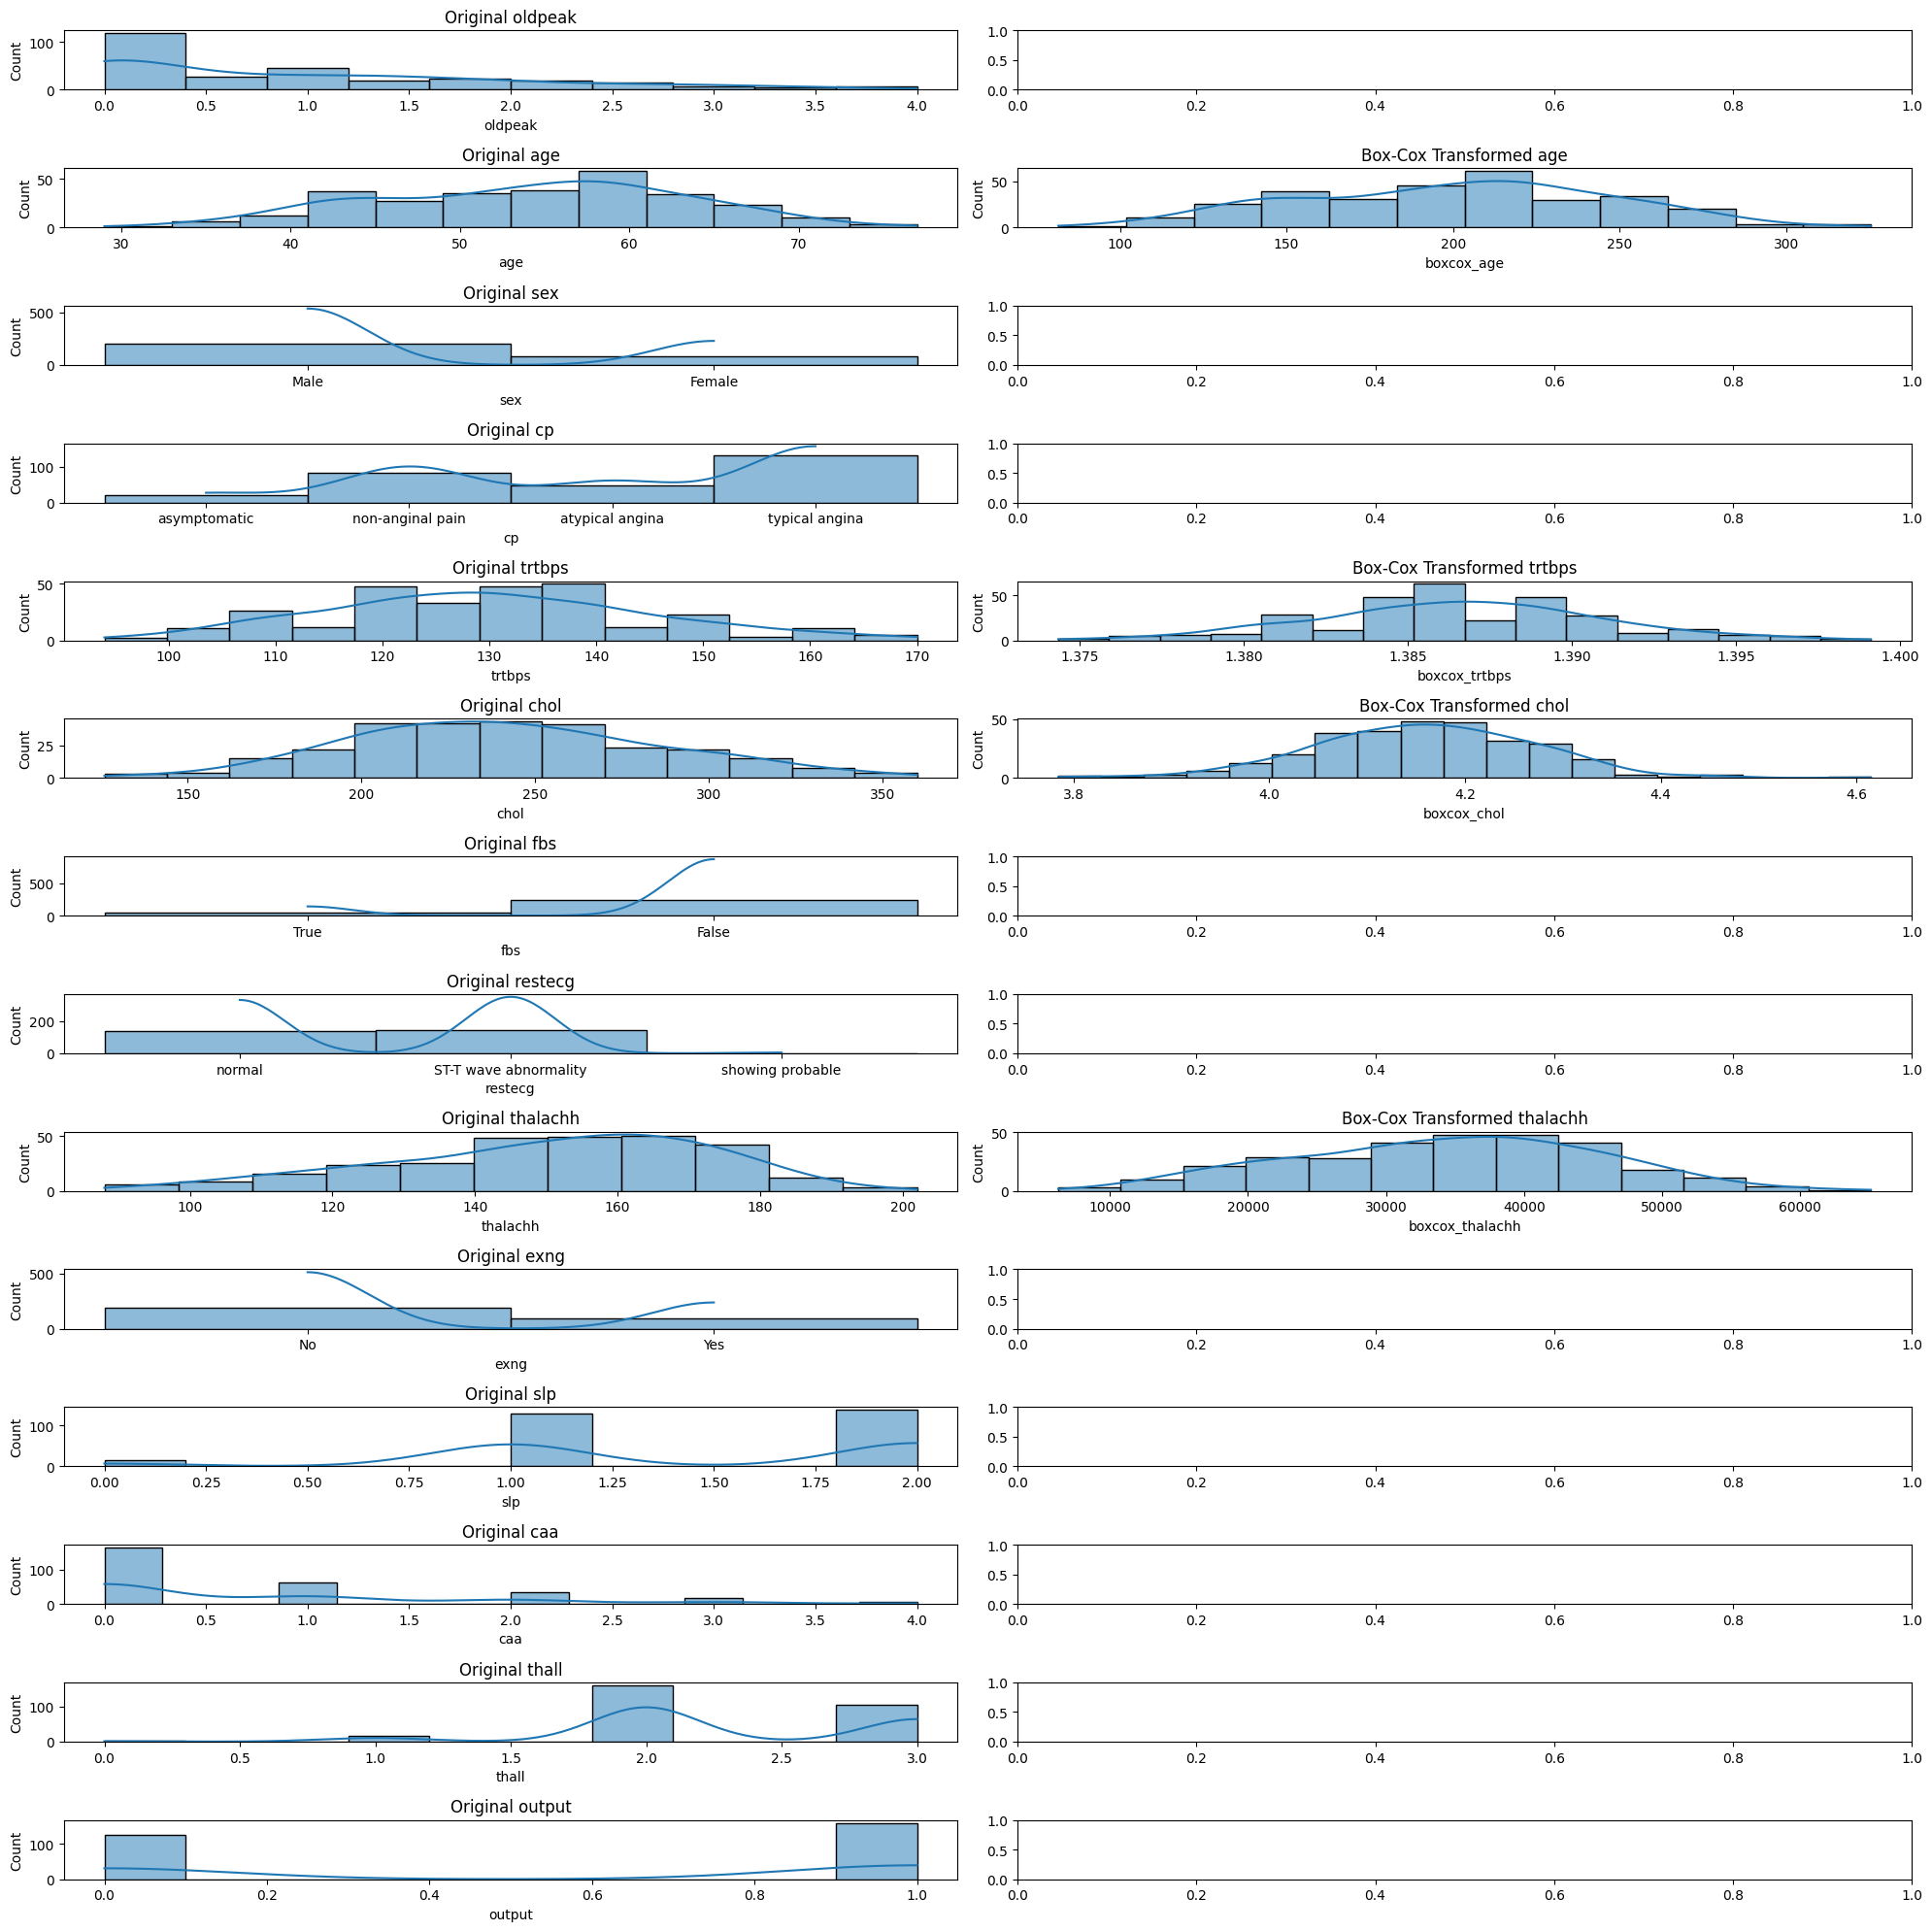

In [ ]:
boxcox_transformed_df_pandas = boxcox_transformed_df.to_pandas()

# Plotting the distributions
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(20, 20))

for i, col in enumerate(numerical_columns):
    sns.histplot(df_pandas[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f"Original {col}")

    if f"boxcox_{col}" in boxcox_transformed_df_pandas.columns:
        sns.histplot(boxcox_transformed_df_pandas[f"boxcox_{col}"], ax=axes[i, 1], kde=True)
        axes[i, 1].set_title(f"Box-Cox Transformed {col}")

plt.tight_layout()
plt.show()

In [ ]:
# Apply Yeo-Johnson transformation to all numerical columns
pt = PowerTransformer(method='yeo-johnson')
yeo_johnson_transformed = pt.fit_transform(df.select(numerical_columns).to_numpy())

# Create a DataFrame with transformed data
yeo_johnson_transformed_df = df.with_columns(
    [pl.Series(col, yeo_johnson_transformed[:, i]).alias(f"yeojohnson_{col}") for i, col in enumerate(numerical_columns)]
)

print("Yeo-Johnson Transformed DataFrame:")
print(yeo_johnson_transformed_df)

NameError: name 'PowerTransformer' is not defined

In [ ]:
# Convert polars DataFrame to pandas DataFrame for visualization
yeo_johnson_transformed_df_pandas = yeo_johnson_transformed_df.to_pandas()

# Plotting the distributions
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(20, 20))

for i, col in enumerate(numerical_columns):
    sns.histplot(df_pandas[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f"Original {col}")

    if f"yeojohnson_{col}" in yeo_johnson_transformed_df_pandas.columns:
        sns.histplot(yeo_johnson_transformed_df_pandas[f"yeojohnson_{col}"], ax=axes[i, 1], kde=True)
        axes[i, 1].set_title(f"Yeo-Johnson Transformed {col}")

plt.tight_layout()
plt.show()

#Applying Logistic Model

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# X contains the features, y contains the target variable
X = df_cleaned.drop(columns=['output'])
y = df_cleaned['output']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Printing confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()



**OBSERVATON**


*   **True Positives (TP):** These are the cases where the model correctly predicted the positive class (heart disease) for the test samples.

*  **True Negatives (TN):** These are the cases where the model correctly predicted the negative class (no heart disease) for the test samples.

*  **False Positives (FP):** These are the cases where the model incorrectly predicted the positive class (predicted heart disease when there was none) for the test samples.

* **False Negatives (FN):** These are the cases where the model incorrectly predicted the negative class (predicted no heart disease when there was one) for the test samples.

